In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize

In [2]:
def load_image_files(container_path, dimension=(64, 64)):
    
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
image_dataset = load_image_files("C:/Users/HP/Pictures/data/")


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=1)

In [5]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [6]:
y_pred = clf.predict(X_test)


In [7]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}]):
              precision    recall  f1-score   support

           0       0.29      0.35      0.32       205
           1       0.32      0.35      0.33       209
           2       0.35      0.37      0.36       223
           3       0.29      0.21      0.25       112
           4       0.41      0.20      0.26        82

    accuracy                           0.32       831
   macro avg       0.33      0.30      0.30       831
weighted avg       0.33      0.32      0.32       831




In [8]:
from sklearn.metrics import accuracy_score
print("accuary",accuracy_score(y_test,y_pred))

accuary 0.3212996389891697


In [10]:
from sklearn.metrics import confusion_matrix


In [12]:
matrice =confusion_matrix(y_pred,y_test)


<IPython.core.display.Javascript object>


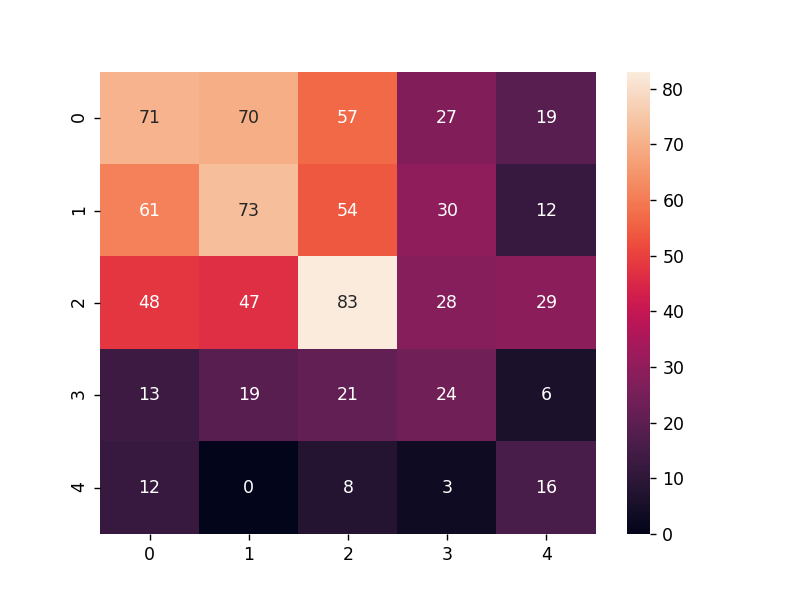

In [13]:
import seaborn as sns
sns.heatmap(matrice, annot=True)